In [114]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [115]:
##load
digits =datasets.load_digits()
print(digits.keys())

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])


In [116]:
print('data',digits.data)

data [[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


In [117]:
print('target',digits.target)

target [0 1 2 ... 8 9 8]


In [118]:
print(digits.data.shape)
print(digits.images.shape)

(1797, 64)
(1797, 8, 8)


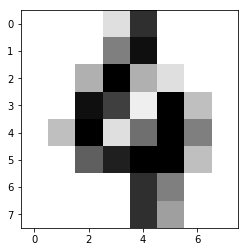

In [119]:
plt.imshow(digits.images[100],cmap=plt.cm.gray_r ,interpolation='nearest')


In [120]:
##Create 
X=digits.data
y=digits.target
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [121]:
###Create our models
knn = KNeighborsClassifier(n_neighbors=7)

In [122]:
print('X_train',X_train.shape,'X_test,',X_test.shape,'y_test',y_test.shape,'y_train',y_train.shape
)
##knn.fit()

X_train (1437, 64) X_test, (360, 64) y_test (360,) y_train (1437,)


In [123]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')

In [124]:
print(knn.score(X_test,y_test))

0.9833333333333333


In [125]:
##Find the best
neighbords=np.arange(1,9)
train_accu=np.empty(len(neighbords))
test_accu=np.empty(len(neighbords))
for i,k in enumerate(neighbords):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    train_accu[i]=knn.score(X_train,y_train)
    test_accu[i]=knn.score(X_test,y_test)
    

In [126]:
print(test_accu)

[0.98611111 0.98611111 0.98611111 0.98333333 0.98333333 0.98055556
 0.98333333 0.97777778]


In [127]:
print(train_accu)

[1.         0.99164927 0.99373695 0.99373695 0.99164927 0.98956159
 0.99025748 0.98956159]


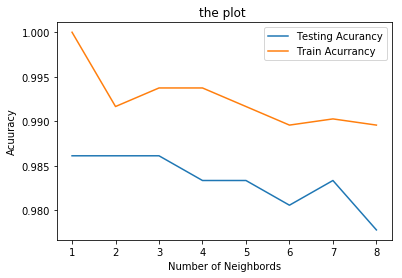

In [128]:
plt.title('the plot ')
plt.plot(neighbords,test_accu,label='Testing Acurancy')
plt.plot(neighbords,train_accu,label='Train Acurrancy')
plt.legend()
plt.xlabel('Number of Neighbords')
plt.ylabel('Acuuracy')
plt.show()

In [129]:
##Other Ways
k_values=[i for i in range(1,50,2)]
print(k_values)

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49]


In [130]:
k_acc=[]


In [131]:
a=0
b=0
for i in k_values:
    knn=KNeighborsClassifier(n_neighbors=i,n_jobs=-1)
    cv_scores=cross_val_score(knn,X_train,y_train,cv=5,scoring='accuracy')
    k_acc.append(cv_scores.mean())
    ##print(cv_scores.mean())
    if cv_scores.mean()>a:
        a=cv_scores.mean()
        b=k_acc.index(a)
        

In [132]:
print(a,'  ',b)

0.99019968440874    0


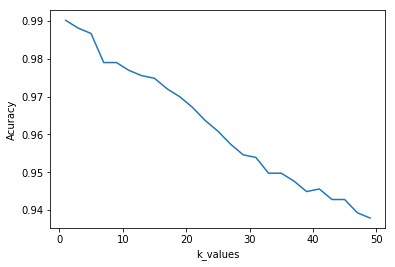

In [133]:
plt.plot(k_values,k_acc)
plt.xlabel('k_values')
plt.ylabel('Acuracy')
plt.show()